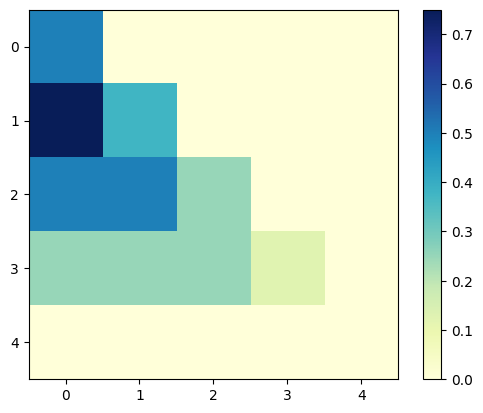

In [1]:
# initialize the reward matrix
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)
num_states = 5
num_actions = 5 # producing highest quantity
action2bid = np.linspace(0,1,num_actions)
reward = np.zeros((num_actions, num_actions))
for i in range(reward.shape[0]):
    for j in range(reward.shape[1]):
      if i>j: 
        reward[i, j] += 1-action2bid[i]
      elif i==j:
        reward[i, j] += (1-action2bid[i])/2
      else:
        reward[i, j] += 0

# Plot heatmap
plt.imshow(reward, cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.show()

In [3]:
import random
import numpy as np

# initialize parameters
gamma = 0.0
alpha = 0.1
initial_eps = 1.0
eps_decay = 0.99999
min_eps = 0.001
eps = initial_eps

# initialize the Q-table
Q1_period1 = np.ones((num_actions,num_actions))
Q2_period1 = np.ones((num_actions,num_actions))
agent1_period1_history = []
agent2_period1_history = []
winning_bid_history = []
agent1_total_reward = []
agent2_total_reward = []

In [4]:
# initialize the state
num_episodes = 2000000
winning_bid = 0
for episode in range(num_episodes):

    # ------ Period 1 ------
    # take the action according to exploratory policy
    if np.random.uniform()>eps:
        agent1_action1 = np.argmax(Q1_period1[winning_bid])
    else:
        agent1_action1 = np.random.choice(range(num_actions))
        
    # take the action according to exploratory policy
    if np.random.uniform()>eps:
        agent2_action1 = np.argmax(Q2_period1[winning_bid])
    else:
        agent2_action1 = np.random.choice(range(num_actions))
 
    # collect rewards
    agent1_final_reward = reward[agent1_action1,agent2_action1]
    agent2_final_reward = reward[agent2_action1,agent1_action1]

     # ------ Update Step ------
   
    # agent 1 Q-values
    Q1_period1[winning_bid,agent1_action1] =  (1-alpha)*Q1_period1[winning_bid,agent1_action1] + alpha * (agent1_final_reward + gamma * np.max(Q1_period1[winning_bid]))

    # agent 2 Q-values
    Q2_period1[winning_bid,agent2_action1] =  (1-alpha)*Q2_period1[winning_bid,agent2_action1] + alpha * (agent2_final_reward + gamma * np.max(Q2_period1[winning_bid]))

    # update epsilon
    eps = max(min_eps, eps * eps_decay)

    # winning bid
    winning_bid = max(agent1_action1,agent2_action1)
    
    # print results
    if episode%100000==0:
      print('\n',episode, eps)

    # store history
    agent1_period1_history.append(agent1_action1)
    agent2_period1_history.append(agent2_action1)
    winning_bid_history.append(winning_bid)
    agent1_total_reward.append(agent1_final_reward)
    agent2_total_reward.append(agent2_final_reward)


 0 0.99999

 100000 0.36787392299223054

 200000 0.13533257654345696

 300000 0.0497858236999252

 400000 0.018315089424785415

 500000 0.006737711173761154

 600000 0.0024786530280104194

 700000 0.001

 800000 0.001

 900000 0.001

 1000000 0.001

 1100000 0.001


KeyboardInterrupt: 

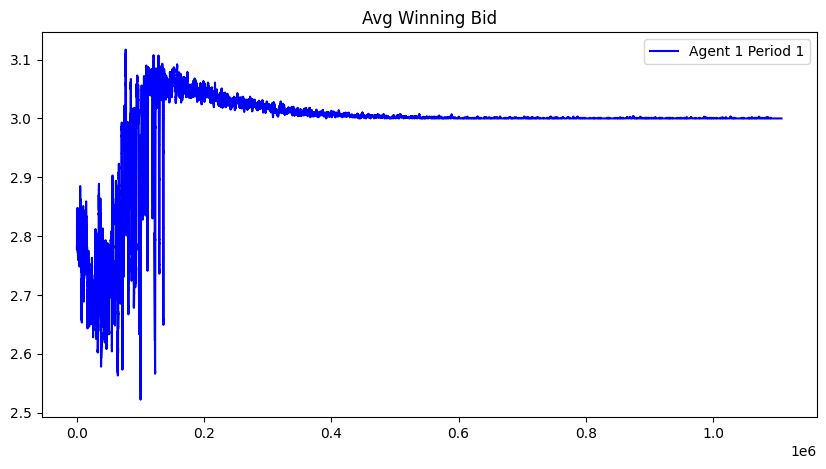

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams['font.size']=10
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
plt.plot(moving_average(np.array(winning_bid_history),1000), label = 'Agent 1 Period 1', c = 'b')
plt.title('Avg Winning Bid') 
plt.legend()
plt.show()